In [1]:
%pip install pandas
%pip install pm4py


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.4 MB/s eta 0:00:00a 0:00:01
  Using cached StringDist-1.0.9.tar.gz (7.4 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 52.6 MB/s eta 0:00:0000:0100:01
  Using cached pydotplus-2.0.2.tar.gz (278 kB)
  Preparing metadata (setup.py) ... done
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 10.5 MB/s eta 0:00:0000:010:01
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  DEPRECATION: stringdist is being installed using 

In [2]:
import pandas as pd
import pm4py

# Adapting the txt file to the task at hand
The dataset given is a file txt from which we will take only the data we need and make save in another file

In [30]:
# path of the correct dataset given
path = 'dataset/'

# file open
f = open(path + '/data/our_dataset.txt', 'r')
lines = f.readlines()[:]

In [31]:
lines = [line.replace('\\','') for line in lines]
lines = [line.replace('\n','') for line in lines]
lines[:5]

['Monday_S1,01-01-24 08:00:00,start_process,Monday,S1,none,none',
 'Monday_S1,01-01-24 08:07:12,begin_activity,Monday,S1,sit_down,1',
 'Monday_S2,01-01-24 08:00:00,start_process,Monday,S2,none,none',
 'Monday_S2,01-01-24 08:08:30,begin_activity,Monday,S2,physical_activity,1',
 'Monday_S3,01-01-24 08:00:00,start_process,Monday,S3,none,none']

In [5]:
# get the relevant information of all lines
lines = [line.split('(')[1] for line in lines]
lines = [line.split(')')[0] for line in lines]
lines[:5]

['1,begin_of_process,monday,monday6637,none,none',
 '2,begin_of_activity,monday,monday6637,sit_down,1',
 '3,begin_of_activity,monday,monday6637,eat_meal,1',
 '4,end_of_activity,monday,monday6637,eat_meal,1',
 '5,end_of_activity,monday,monday6637,sit_down,1']

In [32]:
# Save the CSV
write_file = open(path + 'data/our_dataset.txt', 'w')
write_file.write("\n".join(lines))

65256

# Import data as CSV

In [52]:
# According to the paper, we set the column name as the description of the 
# 6-tuple
columns_name = [
    'Case_Identifier',
    'Event_Timestamp' , 
    'Type_Of_Event', 
    'Reference_Workflow',
    'Senior',
    'Name_Activity',
    'Occurrency_Of_Activity'
]

df = pd.read_csv(path + 'data/our_dataset.txt', names = columns_name)
df = df[df['Name_Activity'] != 'none']
df = df[df['Name_Activity'] != ' none']
df.head()

,Case_Identifier,Event_Timestamp,Type_Of_Event,Reference_Workflow,Senior,Name_Activity,Occurrency_Of_Activity
1,Monday_S1,01-01-24 08:07:12,begin_activity,Monday,S1,sit_down,1
3,Monday_S2,01-01-24 08:08:30,begin_activity,Monday,S2,physical_activity,1
5,Monday_S3,01-01-24 08:10:45,begin_activity,Monday,S3,eat_meal,1
6,Monday_S1,01-01-24 08:15:25,end_activity,Monday,S1,sit_down,1
7,Monday_S1,01-01-24 08:20:18,begin_activity,Monday,S1,eat_meal,2


In [53]:
set(df['Name_Activity'].values)

{'be_in_bathroom',
 'be_in_company',
 'drink',
 'eat_meal',
 'hobby',
 'physical_activity',
 'play_phone',
 'read',
 'sit_down',
 'sleep'}

In [54]:
log = pm4py.format_dataframe(df,
                            case_id='Type_Of_Event',
                            activity_key='Name_Activity', 
                            timestamp_key='Event_Timestamp'
                           ) 

log = pm4py.convert_to_event_log(log)
pm4py.write_xes(log, path + 'data/our_dataset_2.xes')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pm4py/utils.py:536: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
exporting log, completed traces :: 100%|██████████| 2/2 [00:00<00:00, 84.30it/s]


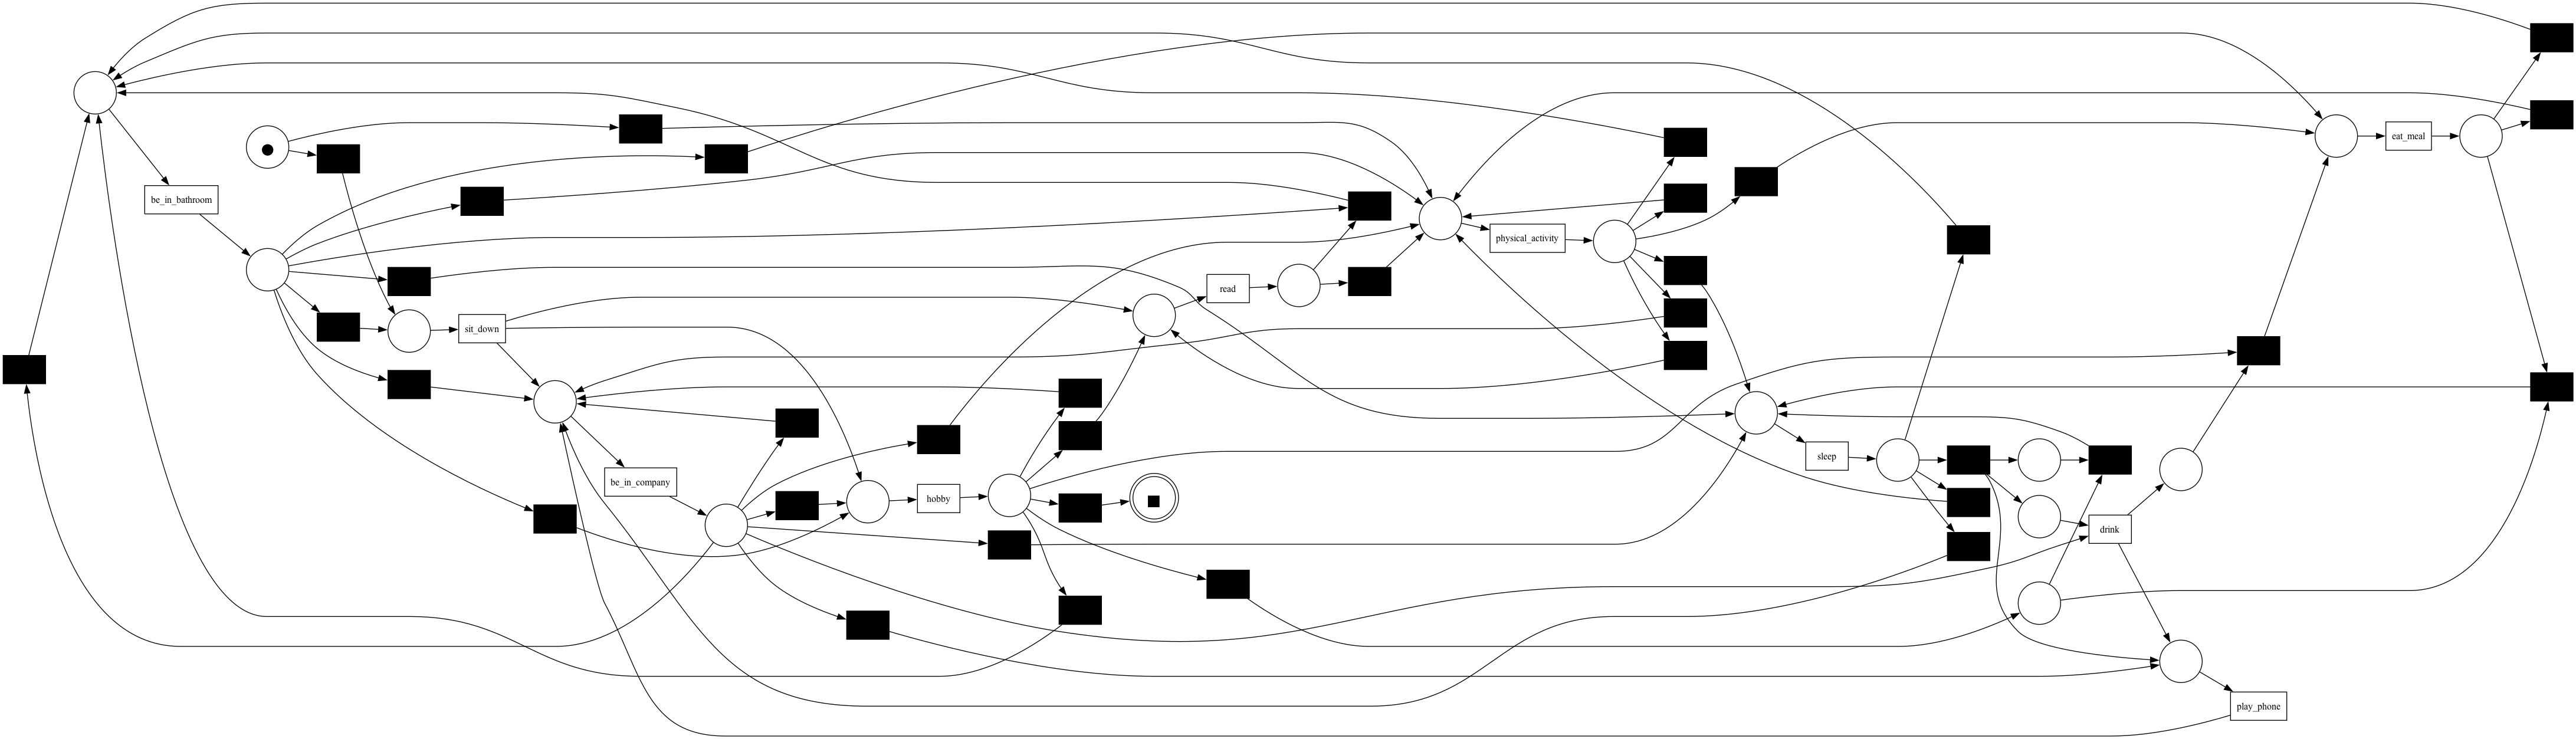

In [55]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner

net, initial_marking, final_marking = heuristics_miner.apply(log)
pm4py.view_petri_net(net, initial_marking, final_marking)

In [42]:
pm4py.vis.save_vis_petri_net(net, initial_marking, final_marking,file_path='./petri_net/first_petri_net_all_senior.png')

''

In [56]:
from pm4py.algo.filtering.log.variants import variants_filter
variants = variants_filter.get_variants(log)
print(f"We have: {len(variants)} variants in our log")

We have: 2 variants in our log


In [58]:
start_activities = pm4py.get_start_activities(log)

end_activities = pm4py.get_end_activities(log)
end_activities

{'hobby': 2}